<a href="https://colab.research.google.com/github/Cooljoe67/eniac_data_cleaning/blob/main/7_seaborn_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualisation with Seaborn

So far, you have learned multiple ways of presenting data:
- utilizing the built-in plotting functionalities of pandas, which allos fast, insightful plots
- using external tools like Tableau, which allows presentation-ready plots


In this notebook we will introduce you to Seaborn, a powerful library for both exploratory and presentation-ready plots in Python. Seaborn is built on top of matplotlib ([matplotlib.org](https://matplotlib.org/)). However, matplotlib can be overwhelming for beginners and has a steep learning curve. That's why we will focus on Seaborn instead.

Seaborn offers user-friendly wrapper functions (a "front end") that allow you create a wide range of different plot types without needing to learn the underlying matplotlib syntax.

While we aim to cover the most important syntax, please refer to the [Seaborn documentation](https://seaborn.pydata.org/api.html) for further details.

## Seaborn basics and exploratory plots

### Importing libraries

As usual, start by loading your desired libraries. The common abbreviation for Seaborn is "sns" which stands for [Samuel Norman Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), the apparent namesake of the library. However, "Seaborn NameSpace" might be easier to remember.

In [1]:
import pandas as pd
import seaborn as sns

### Loading data

One major advantage of Seaborn for data science is its strong compatibility with pandas DataFrames. This means you can directly use any DataFrame as input for plotting.

In addition, Seaborn offers easy access to a wide variety of datasets through the `load_dataset()` function.

In this tutorial, we will primarily use the "penguins" dataset, but feel free to explore other datasets [here](https://github.com/mwaskom/seaborn-data).

Let's load the data and take a quick look!

In [2]:
penguins_df = sns.load_dataset("penguins")
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


The dataset offers a variety of numerical features (lengths and mass) as well as categorical features (species, island, sex). This makes it a great dataset for practicing with a plotting library like Seaborn.

### Choosing the plot type

In general, the type of plot you want to create depends on the types of data you are comparing. These comparisons typically fall into three categories:
- numerical vs. numerical: relational plots
- distribution of a single numerical variable: distribution plots
- relations involving at least one categorical variable: categorical plots

<figure>
    <img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">
        <figcaption align="center">Image from <a href="https://seaborn.pydata.org/tutorial/function_overview.html">Seaborn </a>
        </figcaption>
</figure>

Calling each type of plot is as simple as `sns.relplot()`, `sns.displot()`, or `sns.catplot()`. Further, you can choose the exact plot just by adding the agrument `kind`, e.g.
```
sns.relplot(kind='line').
```
While seaborn offers functions for each individual plot type (sometimes referred to as "Axes-level" plots), we will stick the three main wrapper functions above (sometimes referred to as "Figure-level" plots).

For a more thorough introduction to the available plotting functions, check out their [overview of Seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html).

While each plot type has its own special parameters to customize behavior, many parameters are shared across different plot types.

In the next section, we'll use a basic relational plot to introduce several of these common parameters, before exploring the other plot types.

### Choosing what to plot: the `data`, `x`, and `y` parameters

A relational plot is used to compare two numerical quantities. Let's explore how the length of a penguin's bill compares to its flipper length. As mentioned earlier, Seaborn works seamlessly with Pandas DataFrames. The first argument to most Seaborn plotting functions is `data=<dataframe name>`, which defines the dataset you are working with. Then, you can refer to specific columns in that DataFrame for other parameters.

In our relational plot, we want the bill length to be displayed on the x-axis and the flipper length on the y-axis. Thus, we write `x='bill_length_mm'` and `y='flipper_length_mm'`.

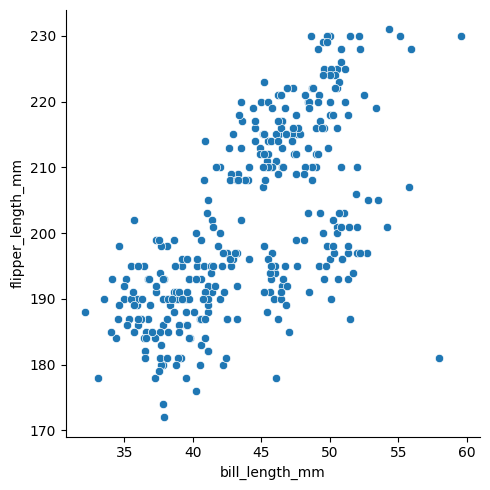

In [ ]:
sns.relplot(data=penguins_df,
            x='bill_length_mm',
            y='flipper_length_mm');

### Adding more dimensions

While a relational plot is typically used to show the relation between two numerical parameters, sometimes adding a third dimension can provide valuable context. 3-D plots exist, but reading them can be difficult on a flat screen; we instead employ a few tricks to display more of our data.

#### The `size` parameter

`size` controls the size of each point. By letting size be dictated by another column of your DataFrame, you can visually inspect the relationship of a third feature. Below, heavier penguins are represented by bigger dots.

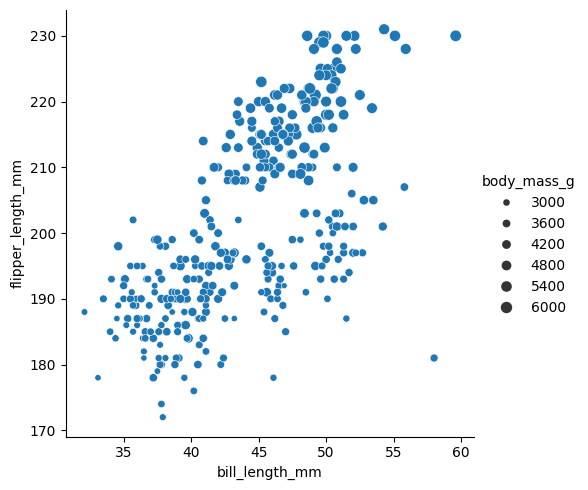

In [ ]:
sns.relplot(data=penguins_df,
            x='bill_length_mm',
            y='flipper_length_mm',
            size="body_mass_g");

As you can see, the dot size now represents the body mass and Seaborn automatically creates a legend with all the necessary information.

While we have now already more information in the plot, we still do not really learn anything new, did we? Thus, you will often want to split the dataset according to some categorical features next.

#### the `hue` parameter

Color is another useful way to add "dimensionality" to a plot while staying in 2-D. Seaborn controls color with the `hue` parameter. `hue` can be set to display both numerical or categorical data. Here, we color the data points according to each penguin's species, a categorical feature.

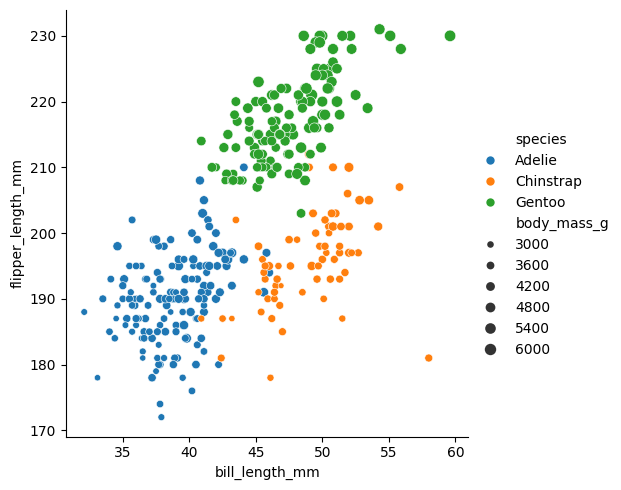

In [ ]:
sns.relplot(data=penguins_df,
            x='bill_length_mm',
            y='flipper_length_mm',
            size="body_mass_g",
            hue="species");

Seaborn automatically generated a legend based on the values in the `species` column, so viewers can easily understand what each color represents, no extra steps needed!

### Changing the marker styles: `style` and `marker`

Make sure to choose colors that are easily distinguishable. We will cover how to customize colors later in the notebook.

However, relying on color alone isn't always ideal, especially for accessibility or print formats. That's where marker styles come in.

By using the `style` parameter, we can assign different marker shapes to different categories, just like we did with hue.
This provides a second visual cue for distinguishing between groups.

Furthermore, we can choose which markers to use via the `markers` parameter (check [here](https://matplotlib.org/stable/api/markers_api.html) for possible marker types).

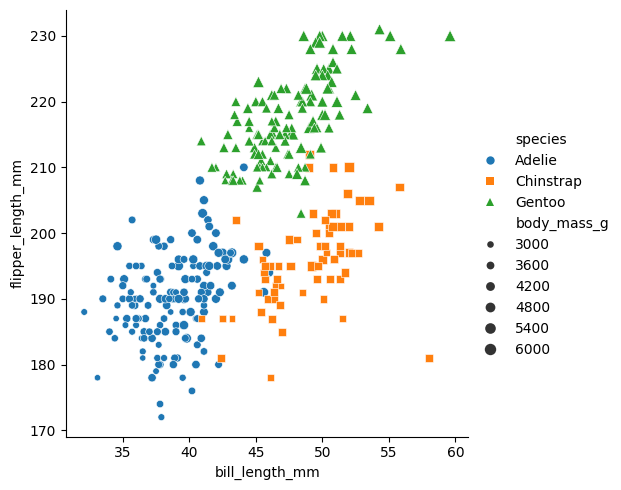

In [ ]:
sns.relplot(data=penguins_df,
            x='bill_length_mm',
            y='flipper_length_mm',
            size="body_mass_g",
            hue="species",
            style="species",
            markers=["o", "s", "^"]);

While we used the same categorical feature for both the colors and the markers here, you could, of course, also choose a second categorical feature for the markers.

> Note: while all the previously discussed parameters are directly applicable to `catplot` and `displot` as well, the `style` and `markers` are unique to `relplot`, as it is the only one using markers.



### Creating subplots: the `col` parameter

You may notice that the data as plotted almost creates 3 distinct clouds of data points, one for each species. Almost, but not quite, so let us consider some additional ways to separate the data.

To do so, we can create subplots for each value corresponding to a categorical feature, i.e., we create separate plots for different categories and display those plots together.

#### the `col` parameter

The `col` parameter controls how plots separate into columns, i.e. side-by-side plots are created, one for each category in the assigned data column.

Here, we will use the gender of the penguin. Since we have 'Male' and 'Female' penguins in our table, we will get two plots, each containing data from a single gender.

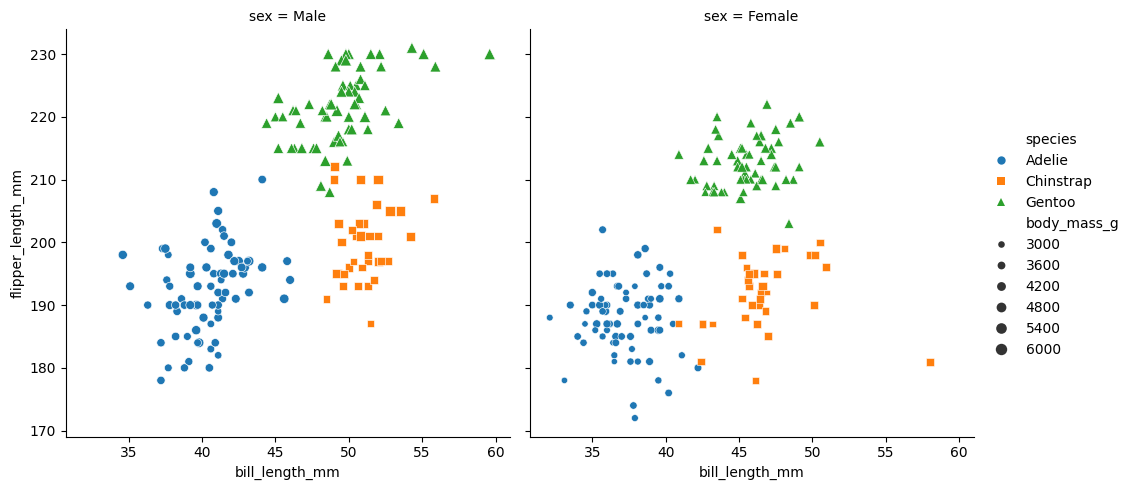

In [ ]:
sns.relplot(data=penguins_df,
            x='bill_length_mm',
            y='flipper_length_mm',
            size="body_mass_g",
            hue="species",
            style="species",
            markers=["o", "s", "^"],
            col="sex");

We see that male penguins tend to have both longer bills and flippers. However, since the male and female data points do not overlap anymore, it became more apparent that the data points in each subplot tend to belong to three different clusters.



> Note: if your categorical feature has a large number of unique entries, splitting it like this will result in a large number of subplots. The `col_wrap` parameter can be used to set a maximum number of side-by-side plots. If the number of subplots is larger, a linebreak is automatically added.
>
> E.g., a plot of the format
>
>       [Plot1]  [Plot2]  [Plot3]  [Plot4]  [Plot5]  [Plot6]
>
> would become
>
>       [Plot1]  [Plot2]  [Plot3]
>
>       [Plot4]  [Plot5]  [Plot6]
>
> if we use `col_wrap=3`.

#### the `row` parameter

Similar to splitting into columns, we can also split our plot into multiple rows. This is achieved by using the `row` parameter.

Here, we will use the information about the penguin's island to separate our data into further subplots:

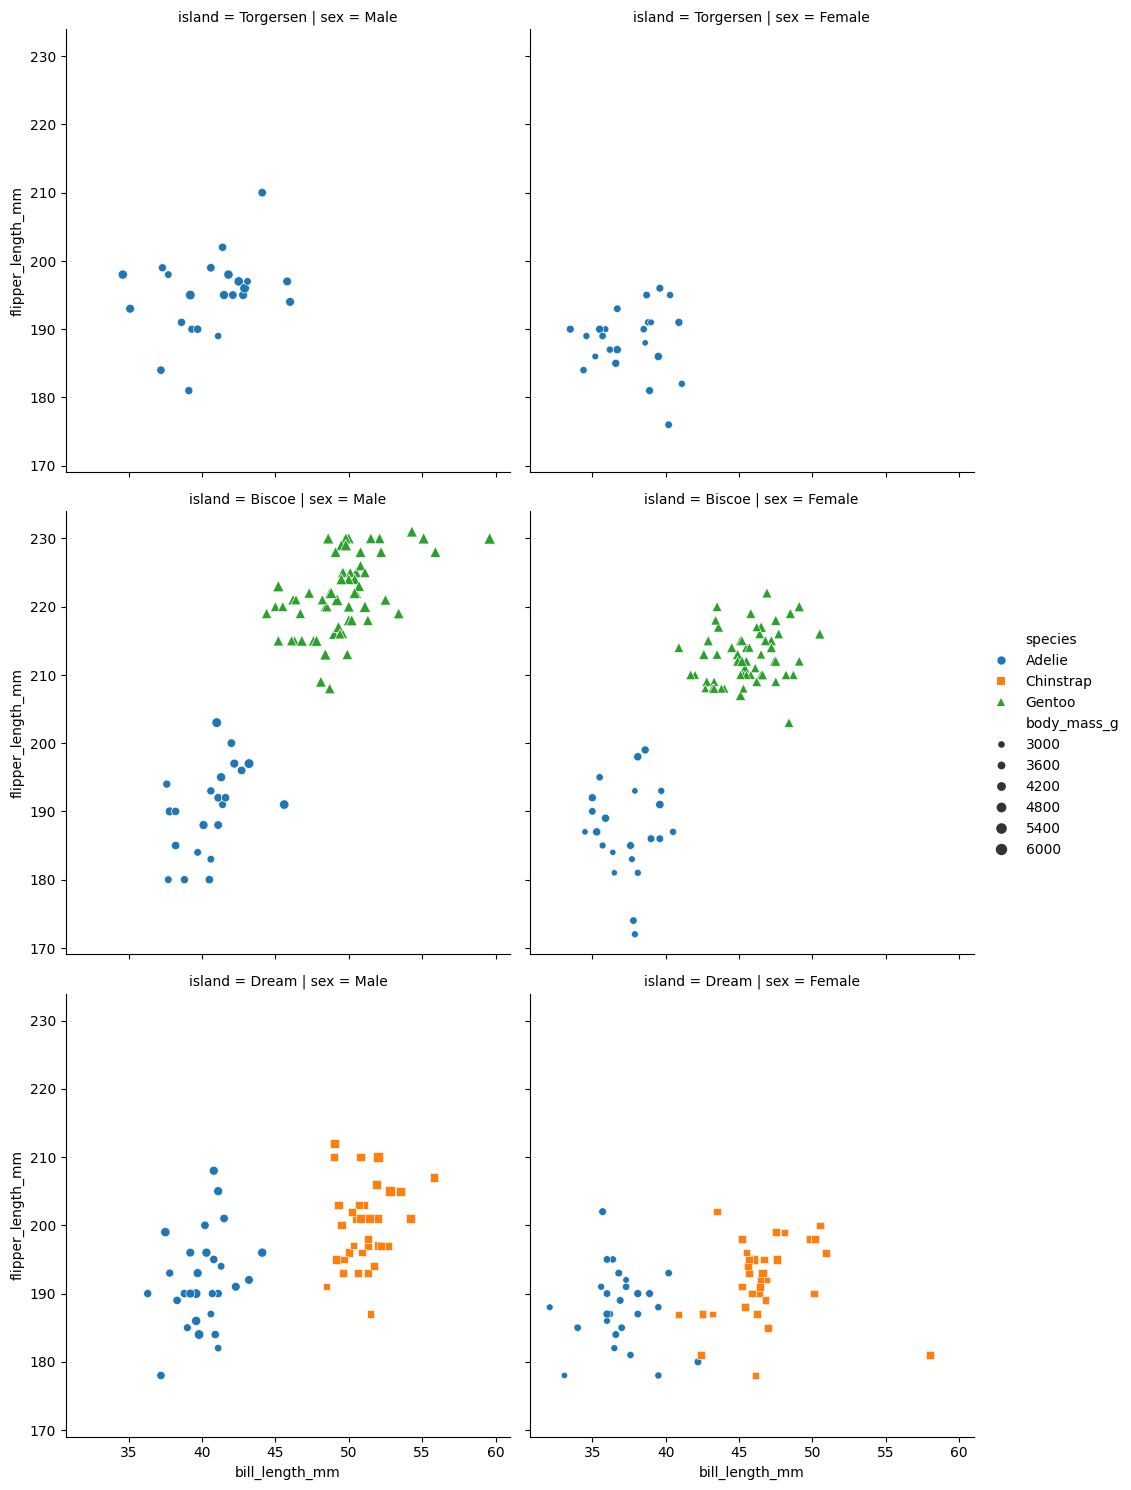

In [ ]:
sns.relplot(data=penguins_df,
            x='bill_length_mm',
            y='flipper_length_mm',
            size="body_mass_g",
            hue="species",
            style="species",
            markers=["o", "s", "^"],
            col="sex",
            row="island");

We can see that such a separation into multiple subplots can be extremely beneficial for exploring your data, letting you to visually inspect the data and to uncover underlying patterns. Would you have notices just by reading the dataset that the different species inhabit only some of the islands? From the plots above this became directly apparent.

However, while exploratory plots can be helpful to understand your data, often you want to present your findings to others. Here, **explanatory** plots are needed. Before introducing you how to style your plots further, let's go back to the different kinds of plots you can create.

## Overview of available plot types

In the following, we will introduce you briefly to the most common plot types and how to achieve them with Seaborn. Again, please refer to Seaborn's [overview of Seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html) if you want to check other plot types.

### Relational plots: `relplot()`

**Scatter plots**

So far, we have plotted scatter plots. This is the default plotting type for a `relplot()`. Thus, explicitly specifying the `kind` was not needed. However, we can see that `kind="scatter"` would therefore produce the same plots.

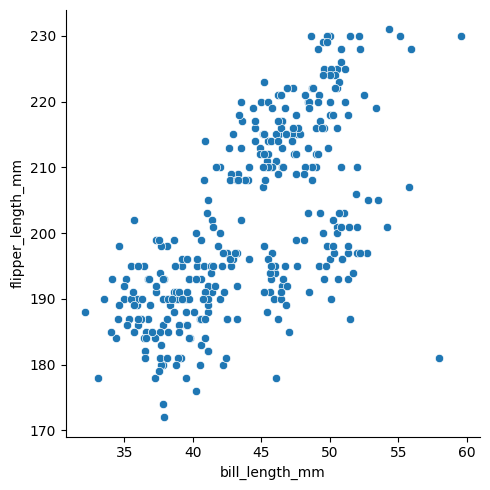

In [ ]:
sns.relplot(kind="scatter",
            data=penguins_df,
            x='bill_length_mm',
            y='flipper_length_mm');

Scatter plots are mainly used when there is no direct functional dependency between the two quantities expected.

**Line plots**

Line plots, on the other hand, are used to show functional dependencies between two quantities. Let's assume we expect the flipper length of a penguin to be proportional to it's body mass. We set `kind="line"` to create a line plot.

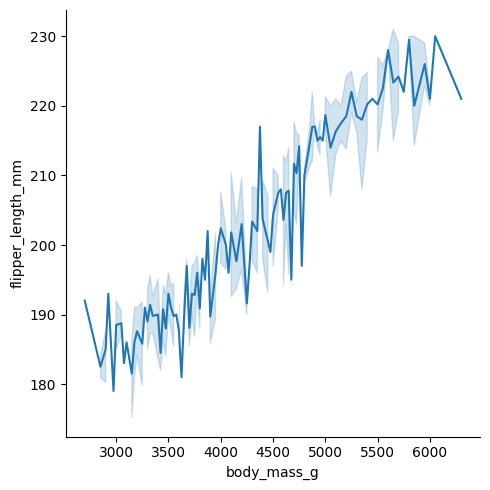

In [ ]:
sns.relplot(kind="line",
            data=penguins_df,
            x='body_mass_g',
            y='flipper_length_mm');

Along with a bold line, the plot also shows a shaded area. Seaborn performs statistical analysis on the data: the line represents the mean for a given body mass while the shaded area signifies the confidence interval (95% by default).

Different measures can be used to calculate the bold central line via the `estimator` parameter. Error estimates are controlled with the `errorbar` parameter. For instance, a confidence interval of 99% can be achived with `errorbar=("ci", 99)`, or two standard deviations with `errorbar=("sd", 2)`. Please refer to https://seaborn.pydata.org/tutorial/error_bars.html for a more detailed explanation of the error bars.

### Categorical plots: `catplot()`

There is a large variety of available categorical plots which can be selected via the `kind` parameter:

**Categorical scatterplots**:

* [.stripplot()](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) - `kind="strip"` the default

* [.swarmplot()](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) - `kind="swarm"`

**Categorical distribution plots**:

* [.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) - `kind="box"`

* [.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) - `kind="violin"`

* [.boxenplot()](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) - `kind="boxen"`

**Categorical estimate plots**:

* [.pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) - `kind="point"`

* [.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) - `kind="bar"`

* [.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) - `kind="count"`

Each of these have individual parameters that you can find on their documentation page.

We will briefly show you two of the most common categorical ones in the following.

**Count plot**

The count plot, as its name suggest, counts the number of occurrences for each category value of a feature.

We can for example count how many penguins of each species exist in our data.

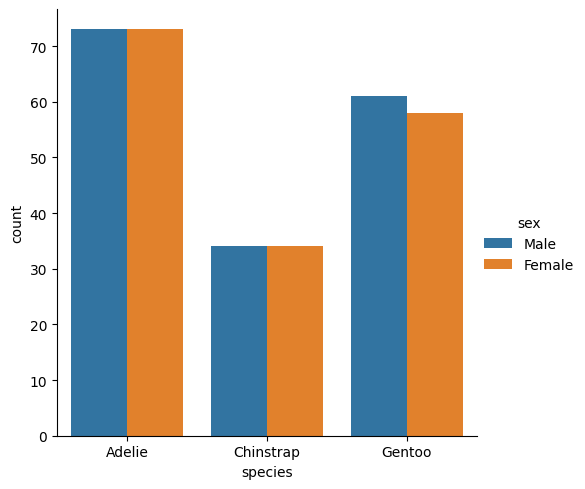

In [ ]:
sns.catplot(kind="count",
            data=penguins_df,
            x="species",
            hue="sex");

> Note, no `y` data needs to be provided since the count itself is shown on the y-axis. As can be seen, we can combine catplots with most of the previously discussed parameters, thus we used here the `hue` to get separate bars for each gender.

**Bar plots**

Similar in shape to a count plot, a bar plot can be used to display any aggregate number on the y-axis.

Let's check the average body mass by species and gender. We'll include an error bar of one standard deviation to show the uncertainty in each measure.

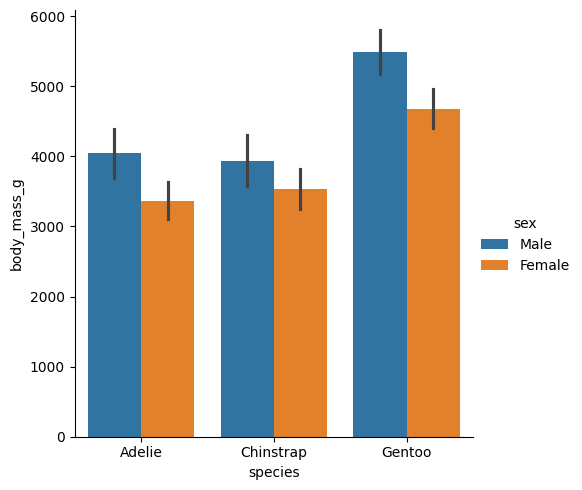

In [ ]:
sns.catplot(kind="bar",
            data=penguins_df,
            x="species",
            y="body_mass_g",
            hue="sex",
            errorbar="sd");

Here, each bar displays the mean body mass, while the error appears as a small black line.

### Distribution plots: `displot()`

Distribution plots are used to show how one continuous quantity is distributed. Available plot types are:

* [.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) - `kind="hist"` the default
* [.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) - `kind="kde"`
* [.ecdfplot()](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot) - `kind="ecdf"`

**Histograms**

The most common distribution plot is a histogram. Let's analyze how the body mass is distributed.

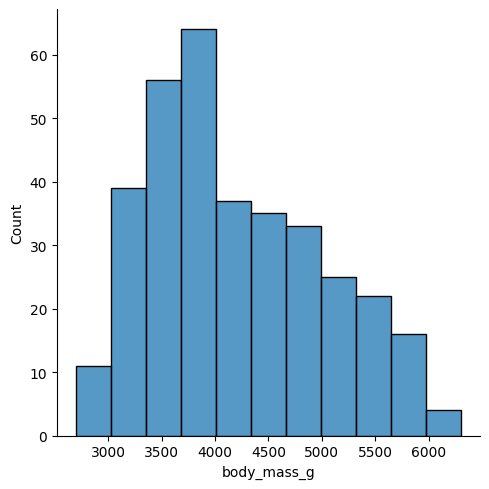

In [ ]:
sns.displot(kind="hist",
            data=penguins_df,
            x="body_mass_g");

The fineness of a histogram can be controled two ways:
* `bins` sets the number of bars displayed on the graph
* `binwidth` sets how wide each bin will be (and overrides `bins`)

Additionally, the limits of the histogram can be set (to exclude outliers, say) by using `binrange`. Check out the documentation for more!

Let's adjust our plot by separating pengins into 100 gram groupings.

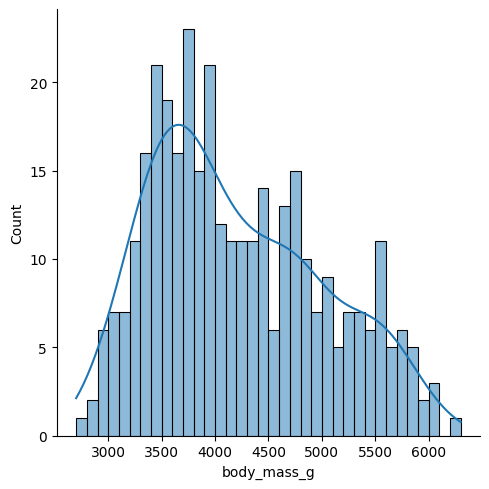

In [ ]:
sns.displot(kind="hist",
            data=penguins_df,
            x="body_mass_g",
            binwidth=100,
            kde=True);

In addition to our bars, we added with `kde=True` a kernel density estimation. KDE is a smooth curve that estimates the overall distribution. Take a look at [Seaborn's KDE tutorial](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde) if you are interested in more details.

In case you are interested in just the smooth curve and not the binned data, `kind="kde"` will do the trick for you.

## Explanatory plots

While we have already produced quite insightful plots, they were not yet really presentation ready, were they? Let's try to optimize one basic plot, namely the species count (here, for simplicity, without gender information).

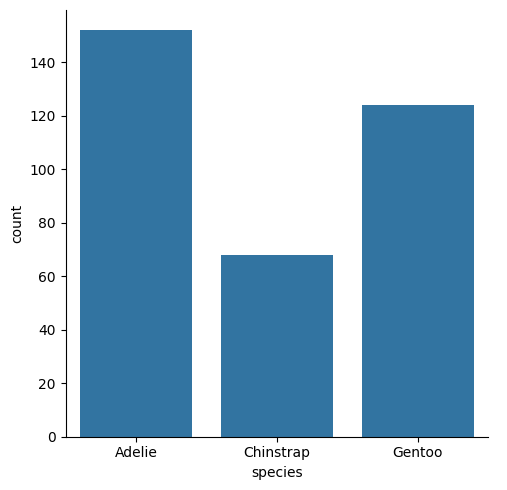

In [ ]:
sns.catplot(kind="count",
            data=penguins_df,
            x="species");

What are some things we may want to optimize?
*   while vertical bars are sometimes useful, horizontal ones are often preferred
*   color should be used to direct the eyes; we'll bring focus to **one** of the species
*   the plot could be bigger and less squished
*   the axis labels might be more meaningful
*   our plot has no title yet

### horizontal bars

So far, we plotted our categorical feature on the x-axis and the calculated values like count or mean on the y-axis. However, Seaborn can easily flip the plot for you by defining only the `y` parameter and not the `x` parameter.

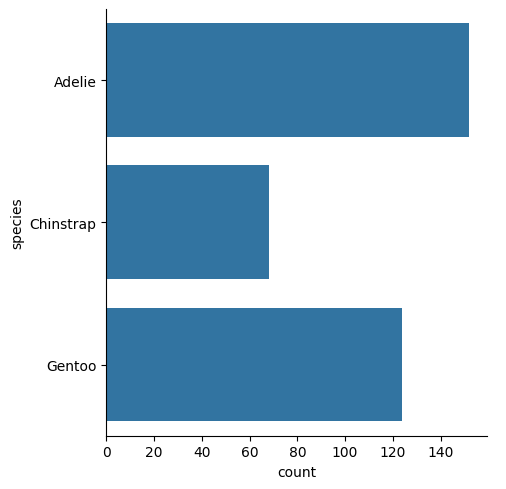

In [ ]:
sns.catplot(kind="count",
            data=penguins_df,
            y="species");  # we changed 'x' to 'y' to flip our plot

### Changing colors

We want to highlight one particular species in our plot. Let's choose the Gentoo penguins. The easiest way to highlight a particular bar is of course to use colors. We learnt already that we can add species-dependent colors via `hue=species`.

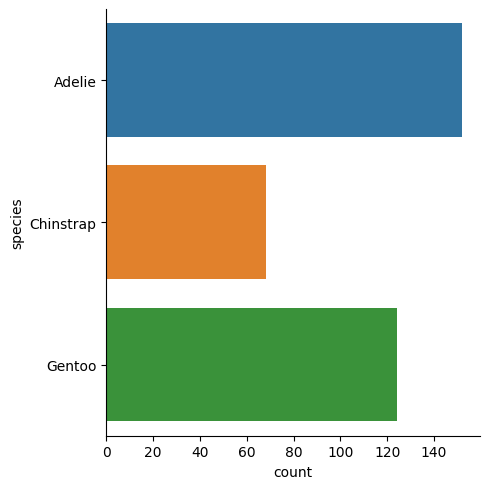

In [ ]:
sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species");  # we want different colors for each species

While this helps us to distinguish the bars better, we did not achieve our goal of highlighting the Gentoo penguins yet, did we?

Before trying to set colors by hand for each category, maybe check first what Seaborn already offers:

in Seaborn functions, the chosen color scheme can be changed via the `palette` parameter.

This parameter can be:
*   a string: Seaborn/matplotlib has predefined color palettes
*   a list/dict: to define your own palette
*   a [colormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html#matplotlib.colors.Colormap) object to modify predefined colormaps further

Please check out the [Seaborn tutorial on palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) for more details about how to choose colors and checkout [this link](https://www.practicalpythonfordatascience.com/ap_seaborn_palette) for an extensive overview of available palettes.



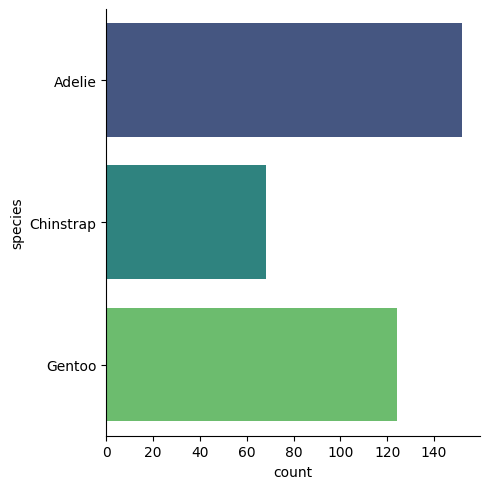

In [ ]:
sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette="viridis");  # we change the color palette do use different colors

Well, those colors are a bit nicer maybe, but we did not yet achieve to highlight only the Gentoo bar. So let's see how we can define our own colors. One approach is via providing a list of colors.

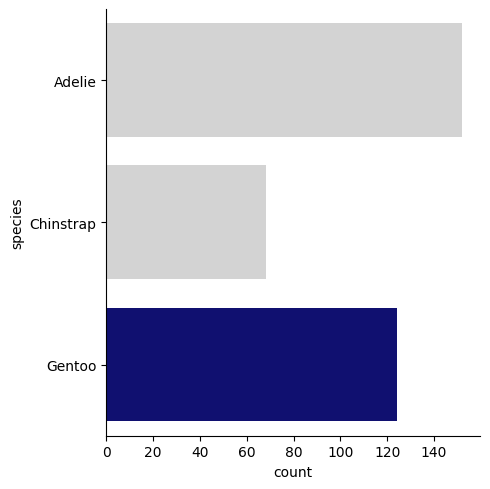

In [ ]:
my_colors = ['lightgray', 'lightgray', 'navy']

sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette=my_colors); # we use our defined color list as palette

Not too bad, right? However, using a list has one main disadvantage: We need to know the order of the categories beforehand. The order is defined by the order of first occurance in the dataframe.
Of course, here we could have just looked at the order of the bars, but look what happens when we use the `order` parameter to rearrange our bars.

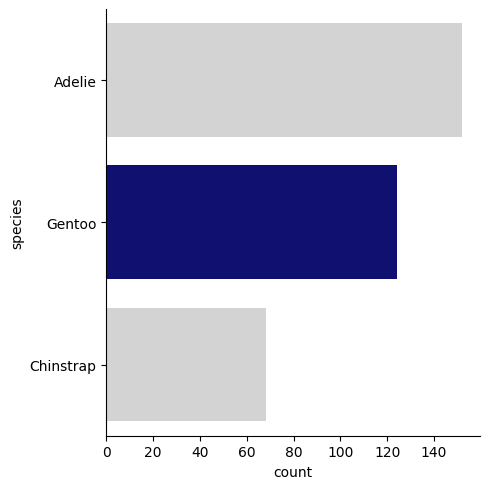

In [ ]:
# we want our bars in order of their length, therefore
# we precompute the order and provide is as a list of strings to Seaborn
ordered_species = penguins_df['species'].value_counts().sort_values(ascending=False).index

# now let's use the same code as before:
my_colors = ['lightgray', 'lightgray', 'navy']

sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette=my_colors,
            order=ordered_species);

Even though the Gentoo bar is now the middle one in our plot, we still had to specify its color as the third entry in our color list. This is because the hues are attributed **before** the output is ordered. Confusing, isn't it?

So is there a more robust way? There is! Let's use a dictionary instead.

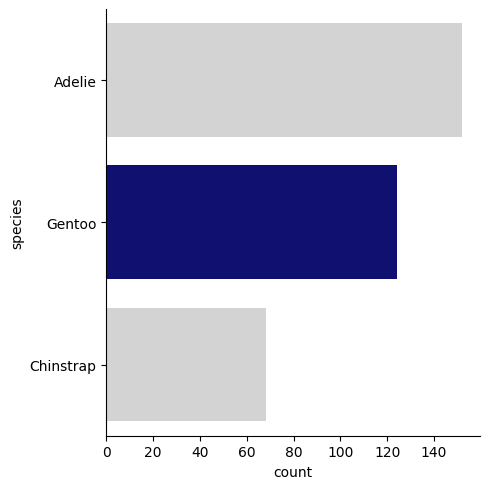

In [ ]:
# let's use a dictionary to define colors:
my_colors = {
    "Adelie": 'lightgray',
    "Chinstrap": 'lightgray',
    "Gentoo": 'navy'}

sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette=my_colors,
            order=ordered_species);

Great! But still a bit manual, isn't it? Imagine if we had 15 species instead of three.

Maybe it's time to revisit your knowledge on list comprehensions and extend it to create a **dictionary comprehension**!

(Or maybe not. We leave it up to you do decide whether or not you try to understand the following code.)

In [ ]:
my_colors = {
    species: ("navy" if species == "Gentoo" else "lightgray")
    for species in penguins_df['species'].unique()
}

my_colors

{'Adelie': 'lightgray', 'Chinstrap': 'lightgray', 'Gentoo': 'navy'}

### Changing plot size and aspect ratio

Let's make our plot a bit bigger. To do so, we first utilize the `height` parameter. While this parameter expects a value "in inches", inches don't always translate to screen size, due to zoom, pixel density and other influences, so take the interpretation of the number with a pinch of salt.

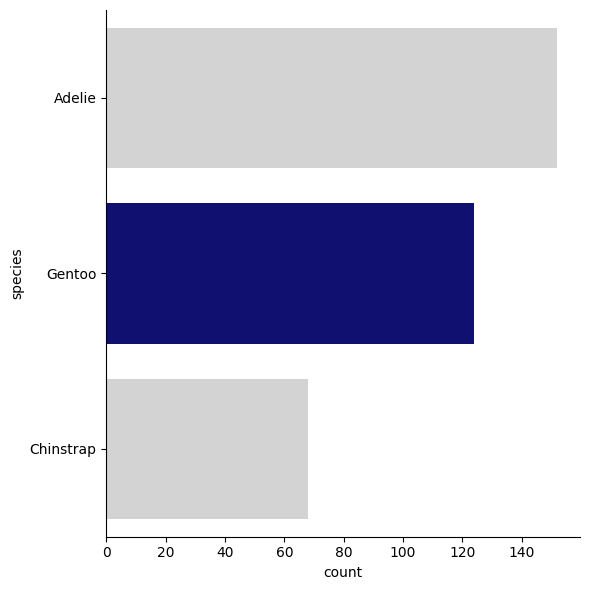

In [ ]:
sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette=my_colors,
            order=ordered_species,
            height=6);  # we adjust the height of the plot

Great, our plot got taller. But wait... why setting the `height` make it wider, too?

This is because there is no width equivalent parameter. Instead, seaborn offers the `aspect` parameter, which defines the ratio of width to height. By default, this value is `1`, meaning the height and width are identical, and any change to `height` directly influences the plot's width as well.

We don't like the result above, so we'll adjust `aspect` ourselves.

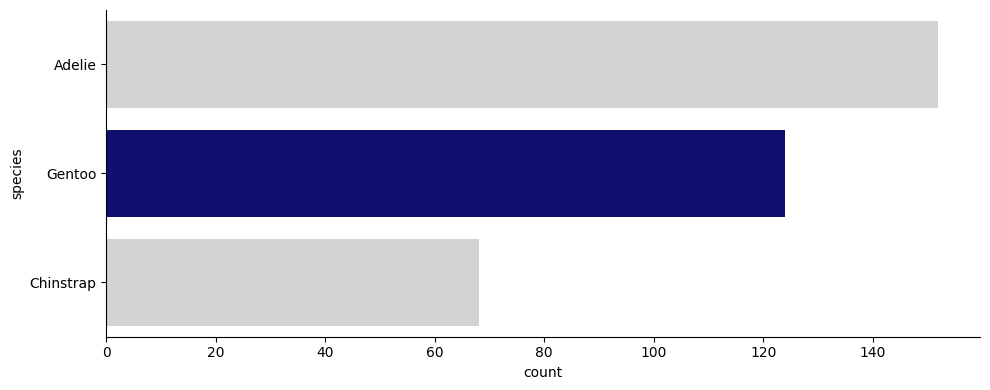

In [ ]:
sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette=my_colors,
            order=ordered_species,
            height=4, # to not get a too large plot we reduce the height a bit
            aspect=2.5);  # let's make our plot 2.5 times as wide as high

> Note: In colab the width is usually limited by the window width. If the height or overall size seems off, try adjusting your window width until the fullsize plot can be displayed.


This is already looking a lot better, but we are not done yet.

### Adding a title header

When you want to share or show a plot to others, the plot itself should be self-explanatory. Often, adding a meaningful header is helpful.

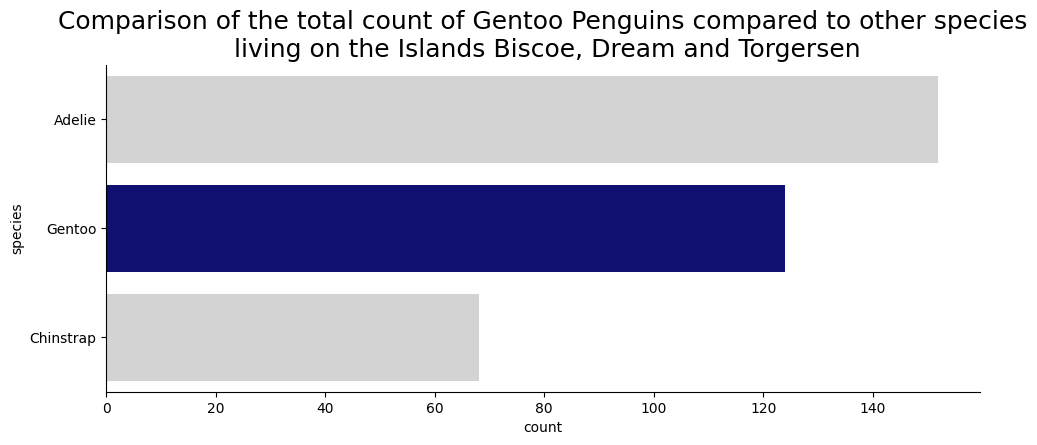

In [ ]:
penguin_plot = sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette=my_colors,
            order=ordered_species,
            height=4,
            aspect=2.5)
penguin_plot.ax.set_title("Comparison of the total count of Gentoo Penguins compared to other species\n living on the Islands Biscoe, Dream and Torgersen", # meaningful title
                     fontsize=18); # increase font size


We can see that the title is not a parameter of the plot creation itself but can be changed via a method call on the resulting plot object. Therefore, we had to store our plot in a variable, here `penguin_plot`.

>Note: The `.ax` call returns the axes object of your plot. While it goes beyond the scope of this tutorial, feel free to dive deeper into the topic of axes and figure level methods via the [Matplotlib User Guide](https://matplotlib.org/stable/users/index.html). In particular, check out the [Axes and subplots](https://matplotlib.org/stable/users/explain/axes/index.html) section on how to access subplots.



Now, we are almost done.

### Axis labels

While "count" and "species" are not too bad, column and measure names are often not really that meaningful and/or not well formatted. Let's replace them with some proper labels instead.

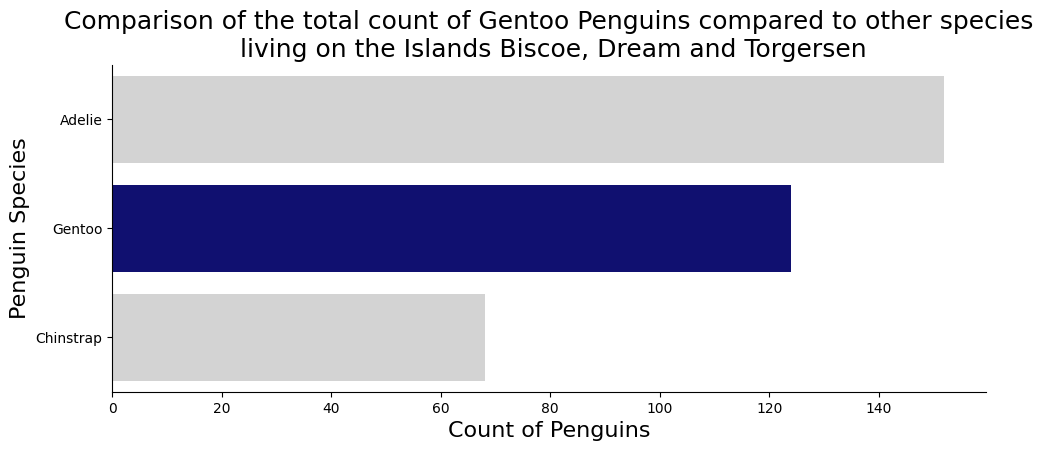

In [ ]:
penguin_plot = sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette=my_colors,
            order=ordered_species,
            height=4,
            aspect=2.5)
penguin_plot.ax.set_title("Comparison of the total count of Gentoo Penguins compared to other species\n living on the Islands Biscoe, Dream and Torgersen",
                     fontsize=18)
penguin_plot.set_axis_labels("Count of Penguins", "Penguin Species", fontsize=16); # meaningful labels and adjusted font size

### Bonus: further styling

Seaborn provides further ways of defining styles. Check out the seaborn page on [controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html).
In addition, since seaborn is built on matplotlib, you can use methods directly from that library to further style your plot to fit your taste and purposes.

The possibilities are almost limitless, so feel free to stick to what you have learned so far.

If you are not overwhelmed yet, check out this small example of possible additional adjustments. No worries if you cannot follow every single step!

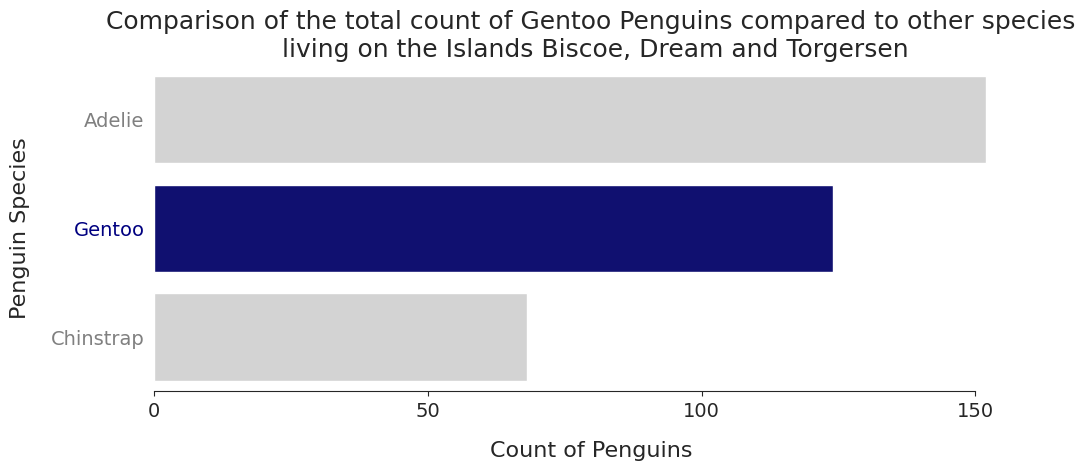

In [ ]:
sns.set_style("white",                               # use a different predefined style.
              {'xtick.bottom': True,                 # override some of its defaults
              })                                     # Note: setting the style affects ALL plots from now on!


penguin_plot = sns.catplot(kind="count",
            data=penguins_df,
            y="species",
            hue="species",
            palette=my_colors,
            order=ordered_species,
            height=4,
            aspect=2.5)
penguin_plot.ax.set_title('Comparison of the total count of Gentoo Penguins compared to other species\n living on the Islands Biscoe, Dream and Torgersen',
                      fontsize=18)
penguin_plot.set_axis_labels("Count of Penguins", "Penguin Species", fontsize=16,
                        labelpad=15);                    # move the labels slightly away from the ticks
penguin_plot.ax.set_xticks([0, 50,100,150])              # show different xticks
penguin_plot.ax.set_xticklabels(penguin_plot.ax.get_xticklabels(), fontsize=14) # change the xlabel sizes
penguin_plot.ax.set_yticks(penguin_plot.ax.get_yticks())                        # set the yticks explicitly before the next step
penguin_plot.ax.set_yticklabels(penguin_plot.ax.get_yticklabels(), fontsize=14) # change the ylabel sizes
# use list comprehension to change label colors:
[label.set_color('navy') if label.get_text() == "Gentoo" else label.set_color('gray') for label in penguin_plot.ax.get_yticklabels()]
penguin_plot.ax.spines['left'].set_visible(False)        # remove the edge to the left
penguin_plot.ax.spines['bottom'].set_bounds(0,150);      # let the bottom axis stop at the last tick

> Hint: if you want to get an overview of which parameters can be changed with `set_theme()`, check the output of `print(sns.axes_style("white"))`.

In [3]:
print(sns.axes_style("white"))

{'figure.facecolor': 'white', 'axes.labelcolor': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'xtick.color': '.15', 'ytick.color': '.15', 'axes.axisbelow': True, 'grid.linestyle': '-', 'text.color': '.15', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'lines.solid_capstyle': 'round', 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'xtick.top': False, 'ytick.right': False, 'axes.grid': False, 'axes.facecolor': 'white', 'axes.edgecolor': '.15', 'grid.color': '.8', 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True, 'xtick.bottom': False, 'ytick.left': False}


# Challenges

## Challenge 1:

Load the `tips` dataset and explore it.

You are the data specialist in a small restaurant. The owner asks you to check whether there is any relation between the amount of tips the waiters get and the total bill size and whether other influences like gender of the customers, group size, or day and time influence the tipping behavior.

Create some exploratory plots and then choose **ONE** small observation you made during the exploration. Turn that insight into a polished, presentation-ready plot.

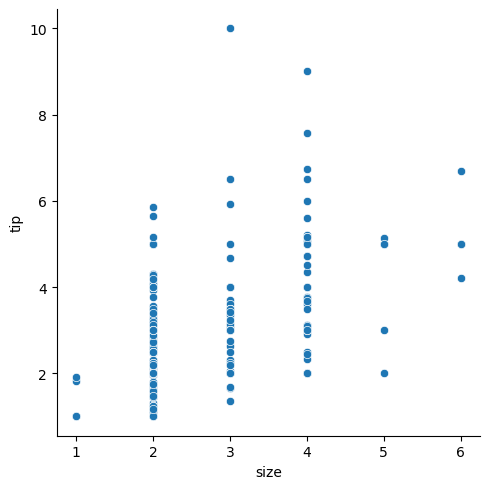

In [13]:
tips_df = sns.load_dataset("tips")
sns.relplot(kind="scatter",
    data=tips_df,
            x='size',
            y='tip');


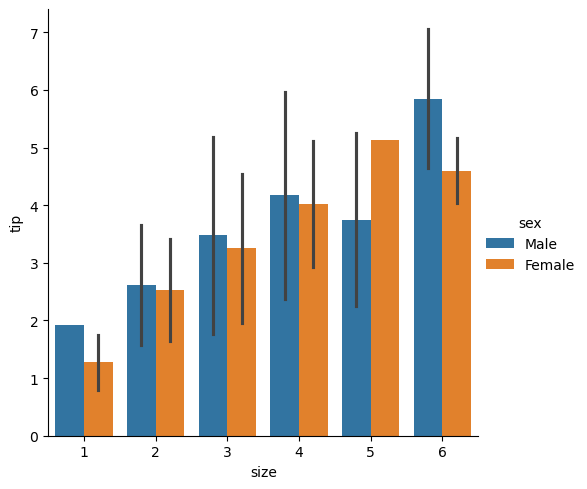

In [21]:
sns.catplot(kind="bar",
            data=tips_df,
            x="size",
            y="tip",
            hue="sex",
            errorbar="sd");

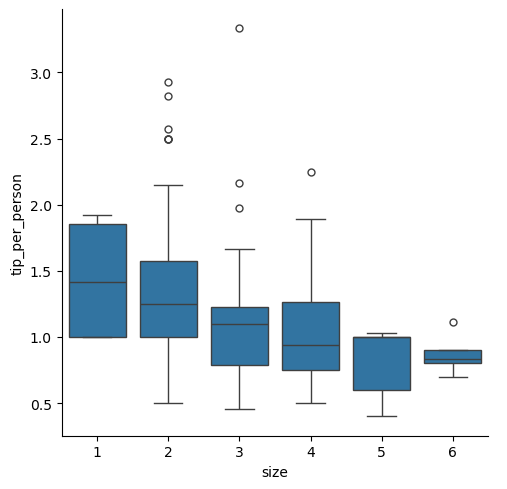

In [29]:
tips_df["tip_per_person"] = tips_df["tip"] / tips_df["size"]

sns.catplot(kind="box",
            data=tips_df,
            x='size',
            y='tip_per_person');



## Challenge 2:

Load the `diamonds` dataset and explore it.

Your boss is planning to buy some diamonds. However, he has no idea about their prices. While he expects that the number of carat has a main influence on the price, other properties like the 'cut', the 'color' or the 'clarity' might be important too.

Create again some exploratory plots and then choose **ONE** small observation you made during the exploration. Turn that insight into a polished, presentation-ready plot. Choose a **DIFFERENT** plottype than in the previous challenge!

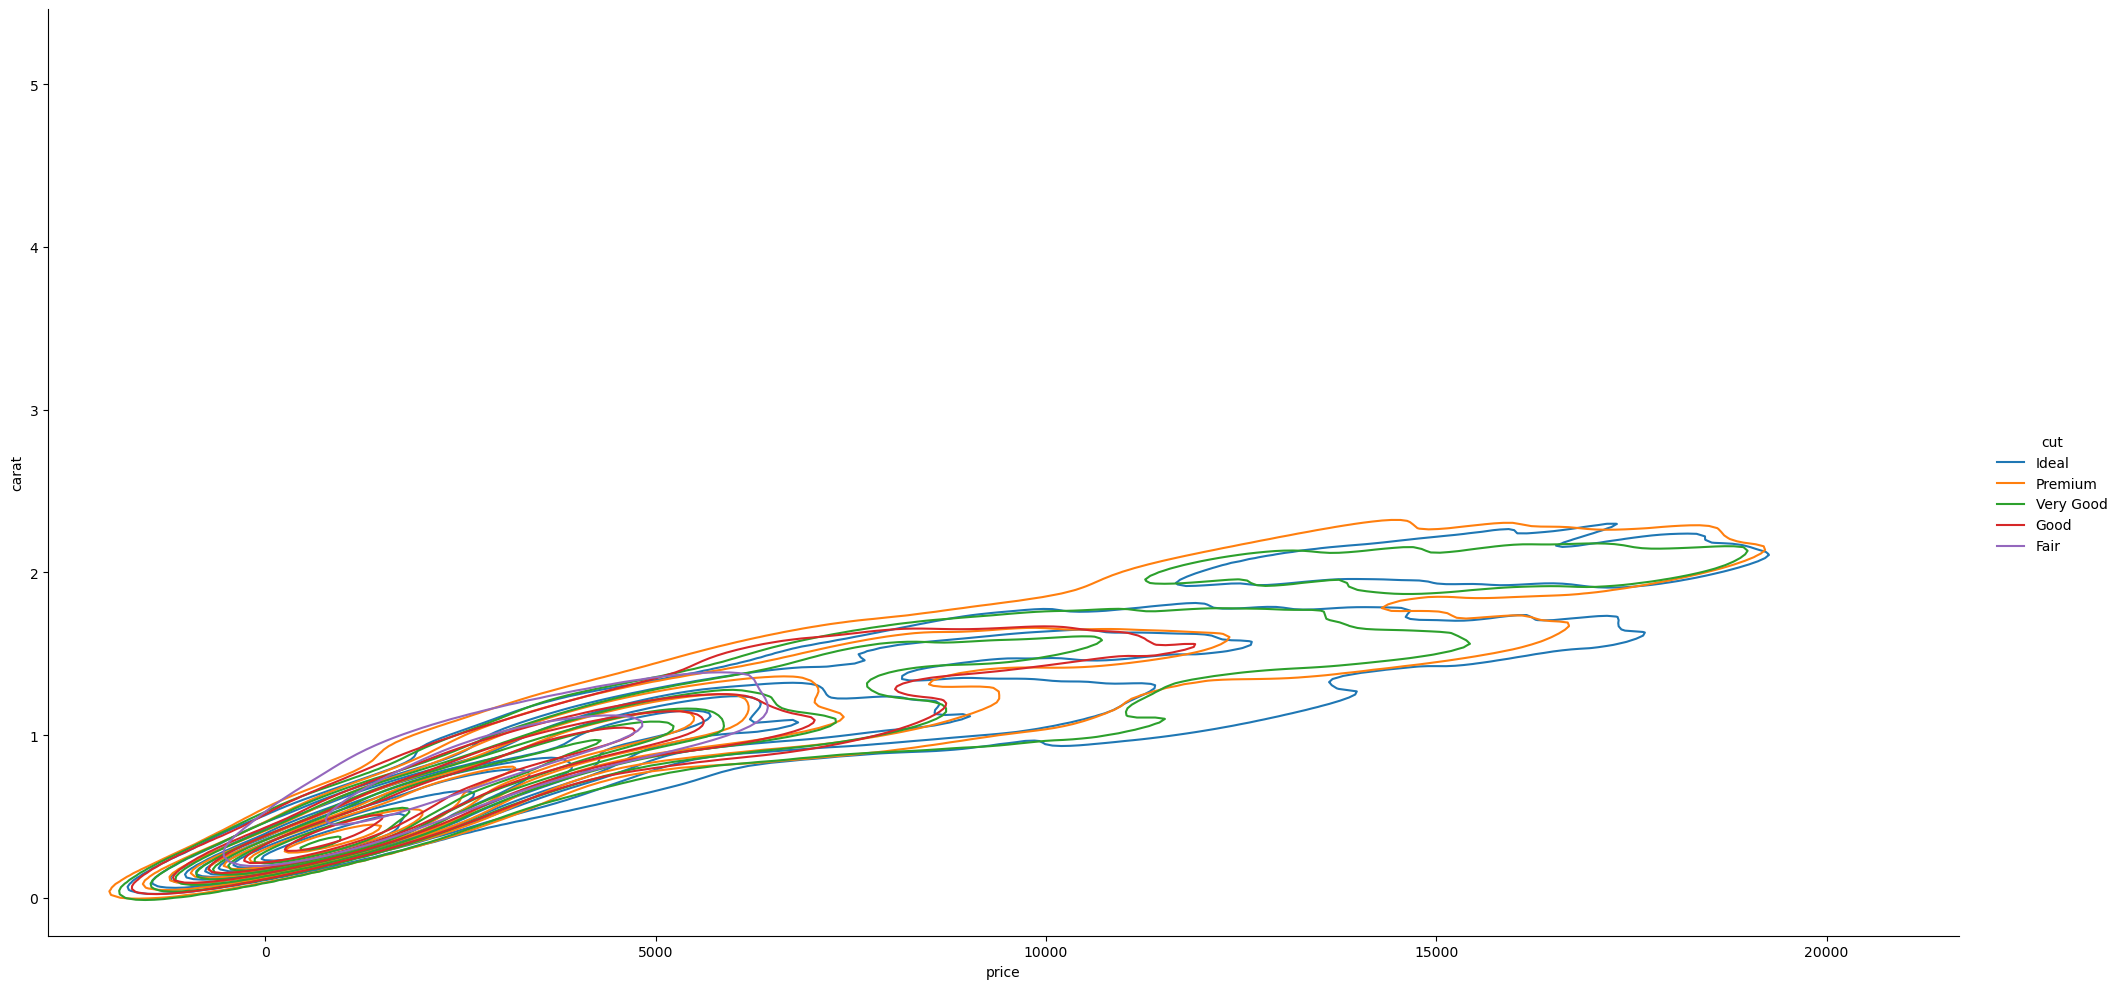

In [51]:
diamond_df=sns.load_dataset("diamonds")

# Exploratory plots
sns.displot(kind="kde",
            data=diamond_df,
            x='price',
            y='carat',
            hue='cut',
            height=10,
            aspect=2);


## Challenge 3:

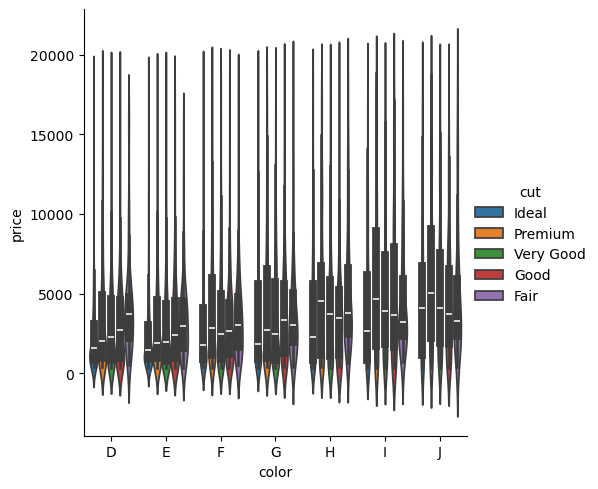

In [54]:
# 2. Violin plot: how cut affects price
sns.catplot(kind="violin",
            data=diamond_df,
            x='color',
            y='price',
            hue='cut');


Let's apply our new plotting skills to the Eniac case. Load the Eniac data in the following cell and then **❗❗❗CHOOSE ONE❗❗❗** of the three challenges below. Create for your chosen task one plot as presentation-ready as possible.
> Note: all tasks will require some prior calculations/adjustments to your dataframe before plotting!

In [56]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

### Challenge 3 - Option 1

Investigate the relationship between the recommended price for a product (`products.price`) and the price that products actually sold for (`orderlines.unit_price`).
Highlight products that are sold on a discount. Feel free to add additional information about the sold products if it provides further insights.

Bonus: If you use a `relplot`, check the matplotlib documentation on how to draw a line where `products.price` equals `orderlines.unit_price` into your plot.

### Challenge 3 - Option 2

Let's investigate when customers like to spend more money. Check how the average order price changes over time.

**Hints:**
* choose a time scale on which you want to display the average order price. Should it be hourly, daily, weekly, yearly? Try different ones.
* calculate the respective average of `total_paid` and make sure you have this saved as a DataFrame. Create your plot using this new DataFrame.

### Challenge 3 - Option 3

Make one or two plots displaying the top 10 products sold in January 2017 & the top 10 products sold in January 2018. Highlight those products that are in both years present in the top 10.